# Model Generation

In [2]:
import numpy
import pandas
import keras 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import maxnorm

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
!ls /gdrive

In [ ]:
dataframe = pandas.read_csv("composite.csv")
dataframe = dataframe.replace({'?': numpy.nan}).dropna()
dataset = dataframe.values

X = dataset[:,:63]
Y = dataset[:,63] 
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3)

model = Sequential()
model.add(Dense(28, input_dim=63, activation='relu', kernel_initializer="uniform"))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu', kernel_constraint=maxnorm(3), kernel_initializer="uniform"))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu', kernel_initializer="uniform"))
model.add(Dense(1, activation='sigmoid', kernel_initializer="uniform"))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_Train, Y_Train, epochs=300, batch_size=10)

scores = model.evaluate(X_Test, Y_Test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# Experimentation

## Data Generation

In [126]:
import random as r
import pandas as pd

NUM_GROUPS = 10000

def random_age_gen():
    return [r.randint(18, 65)]

def random_nominal(size):
    output = [0] * size
    output[r.randint(0, size - 1)] = 1
    return output

def generate_age_data():
    total_data = []
    for i in range(NUM_GROUPS):
        constant = [0, 0, 40, 0] + \
                   random_nominal(7) + \
                   random_nominal(16) + \
                   random_nominal(7) + [0] + \
                   random_nominal(14) + \
                   random_nominal(6) + \
                   random_nominal(5) + \
                   random_nominal(2)
        for age in range(20, 66, 5):
            data = [age] + constant
            total_data.append(data)
    with open("/content/age.csv", 'w') as f:
      pd.DataFrame(total_data).to_csv(f, index=False, header=False)

def generate_workclass_data():
    total_data = []
    for i in range(NUM_GROUPS):
        constantA = random_age_gen() + \
                    [0, 0, 40, 0]

        constantB = random_nominal(16) + \
                    random_nominal(7) + [0] + \
                    random_nominal(14) + \
                    random_nominal(6) + \
                    random_nominal(5) + \
                    random_nominal(2)
        for i in range(0, 7):
            onehot = [0] * 7
            onehot[i] = 1
            data = constantA + onehot + constantB
            total_data.append(data)
    with open("/content/workclass.csv", 'w') as f:
      pd.DataFrame(total_data).to_csv(f, index=False, header=False)

def generate_education_data():
    total_data = []
    for i in range(NUM_GROUPS):
        constantA = random_age_gen() + \
                    [0, 0, 40, 0] + \
                    random_nominal(7)

        constantB = random_nominal(7) + [0] + \
                    random_nominal(14) + \
                    random_nominal(6) + \
                    random_nominal(5) + \
                    random_nominal(2)
        for i in range(0, 16):
            onehot = [0] * 16
            onehot[i] = 1
            data = constantA + onehot + constantB
            total_data.append(data)
    with open("/content/education.csv", 'w') as f:
      pd.DataFrame(total_data).to_csv(f, index=False, header=False)

def generate_marital_data():
    total_data = []
    for i in range(NUM_GROUPS):
        constantA = random_age_gen() + \
                    [0, 0, 40, 0] + \
                    random_nominal(7) + \
                    random_nominal(16)

        constantB = [0] + \
                    random_nominal(14) + \
                    random_nominal(6) + \
                    random_nominal(5) + \
                    random_nominal(2)
        for i in range(0, 7):
            onehot = [0] * 7
            onehot[i] = 1
            data = constantA + onehot + constantB
            total_data.append(data)
    with open("/content/marital.csv", 'w') as f:
      pd.DataFrame(total_data).to_csv(f, index=False, header=False)

def generate_job_data():
    total_data = []
    for i in range(NUM_GROUPS):
        constantA = random_age_gen() + \
                    [0, 0, 40, 0] + \
                    random_nominal(7) + \
                    random_nominal(16) + \
                    random_nominal(7) + [0]

        constantB = random_nominal(6) + \
                    random_nominal(5) + \
                    random_nominal(2)
        for i in range(0, 14):
            onehot = [0] * 14
            onehot[i] = 1
            data = constantA + onehot + constantB
            total_data.append(data)
    with open("/content/job.csv", 'w') as f:
      pd.DataFrame(total_data).to_csv(f, index=False, header=False)

def generate_relationship_data():
    total_data = []
    for i in range(NUM_GROUPS):
        constantA = random_age_gen() + \
                    [0, 0, 40, 0] + \
                    random_nominal(7) + \
                    random_nominal(16) + \
                    random_nominal(7) + [0] + \
                    random_nominal(14)

        constantB = random_nominal(5) + \
                    random_nominal(2)
        for i in range(0, 6):
            onehot = [0] * 6
            onehot[i] = 1
            data = constantA + onehot + constantB
            total_data.append(data)
    with open("/content/relationship.csv", 'w') as f:
      pd.DataFrame(total_data).to_csv(f, index=False, header=False)

def generate_race_data():
    total_data = []
    for i in range(NUM_GROUPS):
        constantA = random_age_gen() + \
                    [0, 0, 40, 0] + \
                    random_nominal(7) + \
                    random_nominal(16) + \
                    random_nominal(7) + [0] + \
                    random_nominal(14) + \
                    random_nominal(6)

        constantB = random_nominal(2)
        for i in range(0, 5):
            onehot = [0] * 5
            onehot[i] = 1
            data = constantA + onehot + constantB
            total_data.append(data)
    with open("/content/race.csv", 'w') as f:
      pd.DataFrame(total_data).to_csv(f, index=False, header=False)

def generate_gender_data():
    total_data = []
    for i in range(NUM_GROUPS):
        constant = random_age_gen() + \
                   [0, 0, 40, 0] + \
                    random_nominal(7) + \
                    random_nominal(16) + \
                    random_nominal(7) + [0] + \
                    random_nominal(14) + \
                    random_nominal(6) + \
                    random_nominal(5)
        for i in range(0, 2):
            onehot = [0] * 2
            onehot[i] = 1
            data = constant + onehot
            total_data.append(data)
    with open("/content/gender.csv", 'w') as f:
      pd.DataFrame(total_data).to_csv(f, index=False, header=False)

generate_age_data()
generate_workclass_data()
generate_education_data()
generate_marital_data()
generate_job_data()
generate_relationship_data()
generate_race_data()
generate_gender_data()

## Predictions

In [142]:
THRESHOLD = 0.22

def categorize_data(dataset):
  dataset[dataset <= THRESHOLD] = 0
  dataset[dataset > THRESHOLD] = 1
  return dataset
  
def predict_data(filepath, input_headers):
  dataframe = pandas.read_csv(filepath, header=None)
  dataframe = dataframe.replace({'?': numpy.nan}).dropna()
  dataset = dataframe.values

  output_data = {}

  size = len(input_headers)
  for i in range(size):
    filtered = dataset[i::size]
    results = categorize_data(model.predict(filtered, verbose = 0))

    header = input_headers[i]
    count = numpy.count_nonzero(results)
    ratio = (count / NUM_GROUPS)
    output_data[header] = ratio
    print(f"{header}: {count} ({ratio})")
  
  return output_data

def plot_data(data):
  names = list(data.keys())
  values = list(data.values())

  plt.bar(range(len(data)), values, tick_label=names)
  plt.xticks(rotation=90)
  plt.xlabel("Categories")
  plt.ylabel(f"Predicted Ratio Earning >= 50k (out of {NUM_GROUPS})")
  plt.show()

age20: 310 (0.031)
age25: 469 (0.0469)
age30: 636 (0.0636)
age35: 812 (0.0812)
age40: 968 (0.0968)
age45: 1004 (0.1004)
age50: 1001 (0.1001)
age55: 957 (0.0957)
age60: 894 (0.0894)
age65: 840 (0.084)


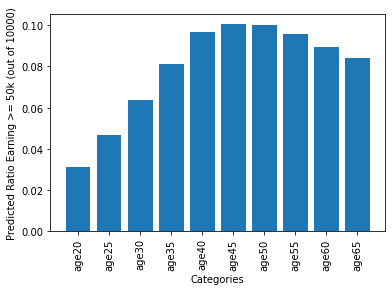

In [143]:
data = predict_data("/content/age.csv", ['age20', 'age25', 'age30', 'age35', 'age40', 'age45', 'age50', 'age55', 'age60', 'age65'])
plot_data(data)

10th: 17 (0.0017)
11th: 150 (0.015)
12th: 289 (0.0289)
1st-4th: 135 (0.0135)
5th-6th: 251 (0.0251)
7th-8th: 338 (0.0338)
9th: 162 (0.0162)
Assoc-acdm: 930 (0.093)
Assoc-voc: 966 (0.0966)
Bachelors: 1314 (0.1314)
Doctorate: 3408 (0.3408)
HS-grad: 754 (0.0754)
Masters: 1613 (0.1613)
Preschool: 0 (0.0)
Prof-school: 1421 (0.1421)
Some-college: 1050 (0.105)


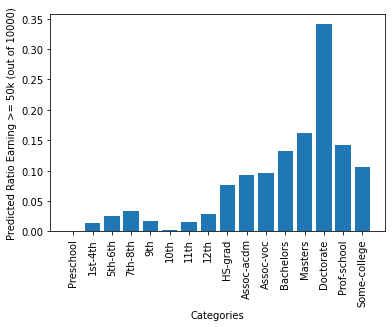

In [144]:
data = predict_data("/content/education.csv", ['10th','11th','12th','1st-4th','5th-6th','7th-8th','9th','Assoc-acdm',
                                               'Assoc-voc','Bachelors','Doctorate','HS-grad','Masters','Preschool',
                                               'Prof-school','Some-college'])
reorder = ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','HS-grad','Assoc-acdm','Assoc-voc',
           'Bachelors','Masters','Doctorate','Prof-school','Some-college']
data = {k: data[k] for k in reorder}
plot_data(data)

Female: 793 (0.0793)
Male: 951 (0.0951)


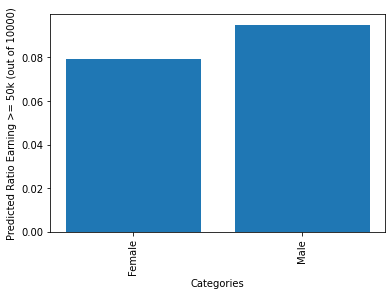

In [145]:
data = predict_data("/content/gender.csv", ['Female', 'Male'])
plot_data(data)

Adm-clerical: 989 (0.0989)
Armed-Forces: 1469 (0.1469)
Craft-repair: 703 (0.0703)
Exec-managerial: 1451 (0.1451)
Farming-fishing: 391 (0.0391)
Handlers-cleaners: 471 (0.0471)
Machine-op-inspct: 471 (0.0471)
Other-service: 301 (0.0301)
Priv-house-serv: 0 (0.0)
Prof-specialty: 2315 (0.2315)
Protective-serv: 842 (0.0842)
Sales: 984 (0.0984)
Tech-support: 1193 (0.1193)
Transport-moving: 959 (0.0959)


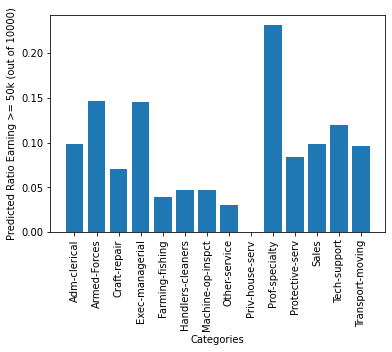

In [146]:
data = predict_data("/content/job.csv", ['Adm-clerical','Armed-Forces','Craft-repair','Exec-managerial','Farming-fishing',
                                         'Handlers-cleaners','Machine-op-inspct','Other-service','Priv-house-serv','Prof-specialty',
                                         'Protective-serv','Sales','Tech-support','Transport-moving'])
plot_data(data)

Divorced: 730 (0.073)
Married-AF-spouse: 1448 (0.1448)
Married-civ-spouse: 1613 (0.1613)
Married-spouse-absent: 636 (0.0636)
Never-married: 501 (0.0501)
Separated: 332 (0.0332)
Widowed: 744 (0.0744)


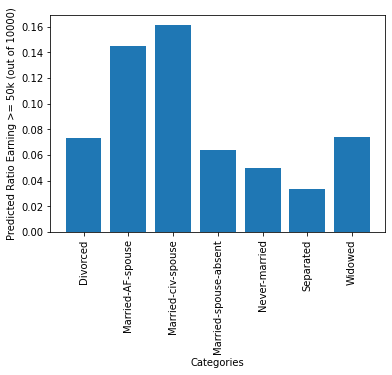

In [147]:
data = predict_data("/content/marital.csv", ['Divorced','Married-AF-spouse','Married-civ-spouse',
                                             'Married-spouse-absent','Never-married','Separated','Widowed'])
plot_data(data)

Amer-Indian-Eskimo: 13 (0.0013)
Asian-Pac-Islander: 1127 (0.1127)
Black: 648 (0.0648)
Other: 1245 (0.1245)
White: 1140 (0.114)


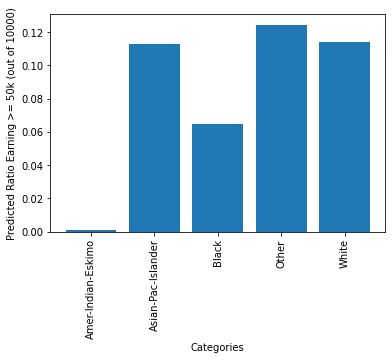

In [148]:
data = predict_data("/content/race.csv", ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White'])
plot_data(data)

Husband: 952 (0.0952)
Not-in-family: 943 (0.0943)
Other-relative: 91 (0.0091)
Own-child: 340 (0.034)
Unmarried: 344 (0.0344)
Wife: 2469 (0.2469)


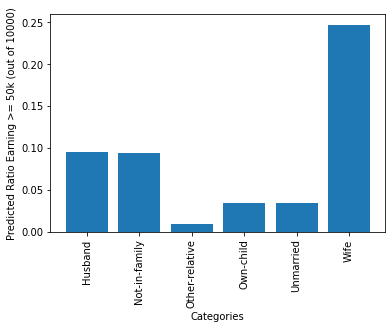

In [149]:
data = predict_data("/content/relationship.csv", ['Husband','Not-in-family','Other-relative','Own-child','Unmarried','Wife'])
plot_data(data)

Federal-govpay: 1127 (0.1127)
Local-gov: 1224 (0.1224)
Private: 693 (0.0693)
Self-emp-inc: 906 (0.0906)
Self-emp-not-inc: 1251 (0.1251)
State-gov: 367 (0.0367)
Without-pay: 268 (0.0268)


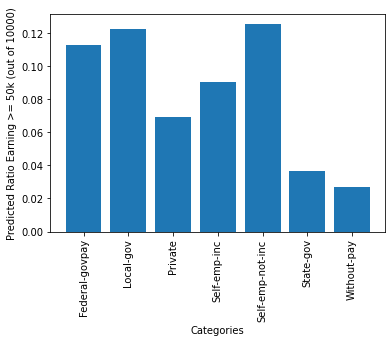

In [150]:
data = predict_data("/content/workclass.csv", ['Federal-govpay','Local-gov','Private','Self-emp-inc','Self-emp-not-inc',
                                        'State-gov','Without-pay'])
plot_data(data)